### Implementation of K-means Clustering Algorithm in Machine Learning



In [ ]:
# Importing some libraries
import numpy as np 
import pandas as pd 

In [ ]:
# Reading dataset
df = pd.read_csv('k-means.csv')

#print 5 top rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
### K-means clustering algorithm works on continous nature based data.
### so we can easily implement such algorithm

### It is an unsupervised learning model. It means that we don't know where data are lying
### or output is unknown due to unlabel data.

In [ ]:
# total size of the dataset
df.shape

(200, 5)

In [ ]:
# print or display total number of columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# The info () method gives use the complete details of the dataframe
# like total number of values holding by each column and row, null or non-null etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Describe () method describes the mathematical function value
df.describe()
# This method works only on numerical data (columns which are having only numerical values)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# checking null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

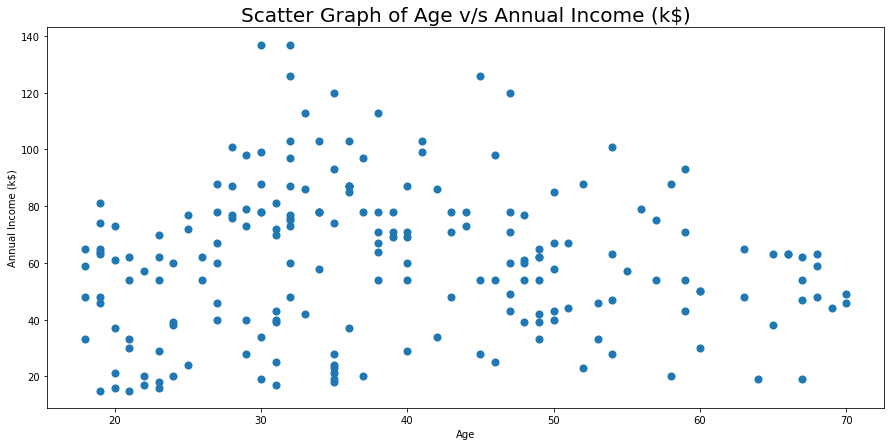

In [ ]:
# So far we have prepared and understand about the dataset 
# We must be happy here to know we have complete dataset which does not belong to any null value.

import matplotlib.pyplot as plt

# 2D Clustering based on Age and Annual Income (k$)
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter Graph of Age v/s Annual Income (k$)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.scatter( x = 'Age', y = 'Annual Income (k$)', data = df, s = 50)
plt.show()

In [ ]:
# Based on age, Annual Income (k$), the cluters will be generated.
# Let us first determine the kth value (Total cluster size)

In [ ]:
# As we know we must have cluster size first before making clusters on the dataset.
# Now its time to decide cluster size 
# we need to import 'kmeans' class from 'cluster' library from the 'sklearn' package

from sklearn.cluster import KMeans

# Deciding K value
# It is necessary to decide k value before centroids as per the K-means algorithm
# we have chosen age and Annual Income (k$) columns
X1 = df[['Age' , 'Annual Income (k$)']].iloc[: , :].values
#X1 would be our 2D array variable.


In [ ]:
print (X1) # age and Annual Income (k$)

[[ 19  15]
 [ 21  15]
 [ 20  16]
 [ 23  16]
 [ 31  17]
 [ 22  17]
 [ 35  18]
 [ 23  18]
 [ 64  19]
 [ 30  19]
 [ 67  19]
 [ 35  19]
 [ 58  20]
 [ 24  20]
 [ 37  20]
 [ 22  20]
 [ 35  21]
 [ 20  21]
 [ 52  23]
 [ 35  23]
 [ 35  24]
 [ 25  24]
 [ 46  25]
 [ 31  25]
 [ 54  28]
 [ 29  28]
 [ 45  28]
 [ 35  28]
 [ 40  29]
 [ 23  29]
 [ 60  30]
 [ 21  30]
 [ 53  33]
 [ 18  33]
 [ 49  33]
 [ 21  33]
 [ 42  34]
 [ 30  34]
 [ 36  37]
 [ 20  37]
 [ 65  38]
 [ 24  38]
 [ 48  39]
 [ 31  39]
 [ 49  39]
 [ 24  39]
 [ 50  40]
 [ 27  40]
 [ 29  40]
 [ 31  40]
 [ 49  42]
 [ 33  42]
 [ 31  43]
 [ 59  43]
 [ 50  43]
 [ 47  43]
 [ 51  44]
 [ 69  44]
 [ 27  46]
 [ 53  46]
 [ 70  46]
 [ 19  46]
 [ 67  47]
 [ 54  47]
 [ 63  48]
 [ 18  48]
 [ 43  48]
 [ 68  48]
 [ 19  48]
 [ 32  48]
 [ 70  49]
 [ 47  49]
 [ 60  50]
 [ 60  50]
 [ 59  54]
 [ 26  54]
 [ 45  54]
 [ 40  54]
 [ 23  54]
 [ 49  54]
 [ 57  54]
 [ 38  54]
 [ 67  54]
 [ 46  54]
 [ 21  54]
 [ 48  54]
 [ 55  57]
 [ 22  57]
 [ 34  58]
 [ 50  58]
 [ 68  59]

In [ ]:
# we need to decide class of clusters based on similarity features
# inertia variable treats as 'means sum of the squared distances'
inertia = []

# we need to use a loop upto 22 times and by this we can get the optimum value of kth.
for n in range(1 , 50):
    # we have kmeans method which is a part of kmeans class.
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 , max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    

    # k-means++ = select initial cluster center for the k-means clustering in a smart way to speed up 
    # convergece and instead of k-means++ we can use 'random'
    
    #n_init = no. of time k-means algorithm will be run with different centroid seeds.

    #tol = relative tolerance

    # algorithm = auto / full / elkan
    # elkan = The elkan variation is more efficient on data with well defined clusters by 
    # using the triangle inequality

    # we are fitting the model based on defined parameters as mentioned above
    algorithm.fit(X1) # X1 contains the data
    
    # inertia keeps the list of means sum of the squared distances
    inertia.append(algorithm.inertia_)

C:\Users\Virendra Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "


In [ ]:
# the inertia variable holds the sum of squared distances as per total loop size i.e; 50
print(inertia)

[176108.77999999997, 87121.56591478694, 59486.961439280356, 39529.887967363524, 31662.412142758705, 25420.642025623845, 21857.01597051596, 18842.049333858366, 15983.972458914095, 13752.722954983832, 12239.836831360863, 11201.16647660381, 10135.76230099357, 9271.509961991416, 8167.754329909217, 7629.697782290167, 7036.683183816753, 6661.75534588671, 6169.6816894706635, 5839.410893273396, 5409.096660284165, 5215.883078033082, 4856.280932955933, 4576.979791407427, 4361.772782446313, 4003.259595959595, 3862.202049704683, 3575.0277739804083, 3404.8052308802294, 3211.121897546896, 3114.2062992562983, 2994.9433122433124, 2885.9918470418465, 2752.642429792429, 2647.1103174603163, 2581.4103174603165, 2522.9025613275626, 2395.4177489177487, 2327.001875901876, 2237.345418470419, 2105.5670995671, 2019.7615440115446, 1956.2615440115442, 1881.103968253968, 1808.853968253968, 1755.773015873016, 1717.6063492063497, 1659.5023809523807, 1573.4801587301574]


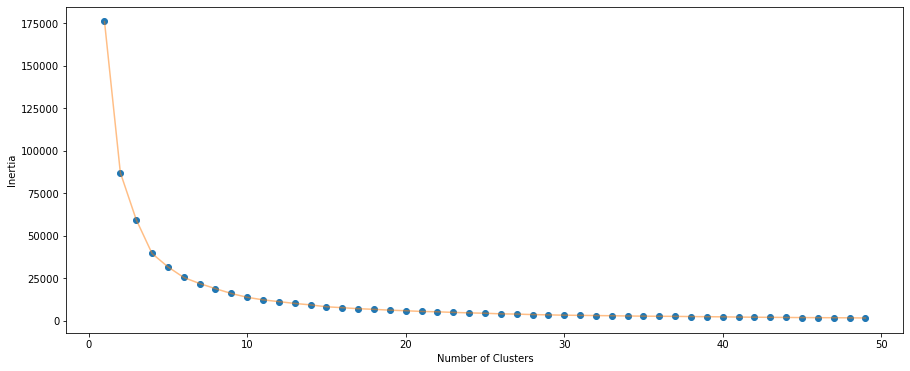

In [ ]:
# we need to display the information to get optimum kth value
# We are plotting a graph to know the 'elbowing' value of kth to get optimum value

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 50) , inertia , 'o') # small circle used to point out the data
plt.plot(np.arange(1 , 50) , inertia , '-', alpha = 0.5) # this will be used to display each point by line style.
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# You have been observed here that k=4 is the optimum value
# Applying KMeans for k or n=4
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
# again fit the model towards k = 4
algorithm.fit(X1)

# this is required to get centroid to make connection between cetroid and datapoint
# label is deciding which data point is belong to which cluster.
# if you have decided that k=4, it means we have range of the clusters from 0 to 3
# label of the datapoints towards the cluster index value
labels1 = algorithm.labels_

# its time to decide centroid of the clusters and we got k=4 (cluster size = 4 and indexed by 0 to 3)
centroids1 = algorithm.cluster_centers_

In [ ]:
labels1

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
centroids1 # this contains the coordinates values

array([[ 31.95890411,  72.95890411],
       [ 30.34693878,  29.26530612],
       [ 55.81481481,  51.77777778],
       [ 39.        , 106.5       ]])

In [ ]:
# So far we have used x1 variable which contains age and Annual Income (k$) 
# and as we know its is a 2D array.

# we need to display our information in cluster pattern basis 
# for doing this we need to transform 2D to one-dimension array by using ravel () method.

h = 0.02 
# this is required to preserve uniformity between x and y datapoints.
# when you are transforming image from one-dimension to another dimernsion.

# Suppose you have a 3D image and want to transform into 2D image 
# keep in mind you want to preserve the coordinates values of x and y 
# after removing or adjusting z-dimension value
# so our actual values of x and y coordinates should not be disturbed.

x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1 # age or 0th index
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1 #Annual Income (k$)

# we need to use meshgrid method from numpy library to get or used to create pairs of 
# coordinates between a range (min and max as we have seen above code (x_min, x_max , y_min and y_max))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print (xx)
print (yy)

# for clustering we need to make our graph into dimension pattern to get proper clusters
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
# The above code will decide the coordinates values with respect to the xx and yy variables.

[[17.   17.02 17.04 ... 70.94 70.96 70.98]
 [17.   17.02 17.04 ... 70.94 70.96 70.98]
 [17.   17.02 17.04 ... 70.94 70.96 70.98]
 ...
 [17.   17.02 17.04 ... 70.94 70.96 70.98]
 [17.   17.02 17.04 ... 70.94 70.96 70.98]
 [17.   17.02 17.04 ... 70.94 70.96 70.98]]
[[ 14.    14.    14.   ...  14.    14.    14.  ]
 [ 14.02  14.02  14.02 ...  14.02  14.02  14.02]
 [ 14.04  14.04  14.04 ...  14.04  14.04  14.04]
 ...
 [137.94 137.94 137.94 ... 137.94 137.94 137.94]
 [137.96 137.96 137.96 ... 137.96 137.96 137.96]
 [137.98 137.98 137.98 ... 137.98 137.98 137.98]]


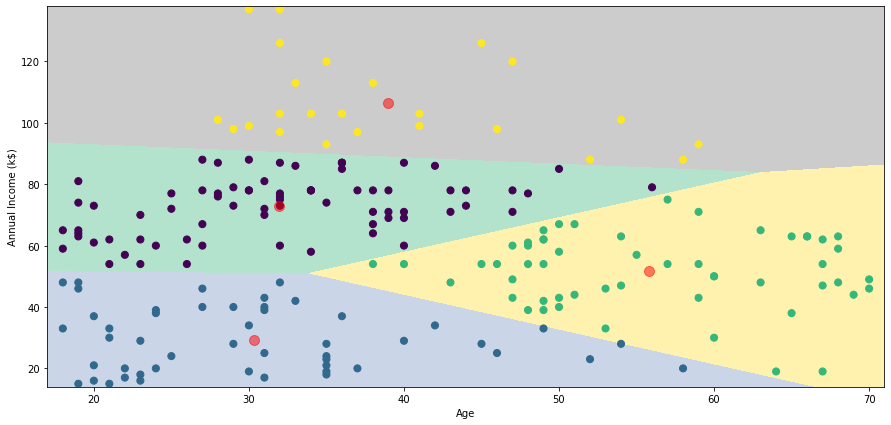

In [ ]:
plt.figure(1 , figsize = (15 , 7) )

# it will clear the graph from existing pattern
plt.clf() # clear the frame because plt variable holds some information into its memory.

Z = Z.reshape(xx.shape) # it is required towards the x and we are changinng its size towards the x.

plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Annual Income (k$)', data = df, c = labels1, s = 50)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 100 , c = 'red' , alpha = 0.5)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Age')
plt.show()

In [ ]:
# Applying KMeans for k=7
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
centroids1

array([[ 24.07142857,  58.85714286],
       [ 27.72972973,  27.21621622],
       [ 35.65      ,  74.55      ],
       [ 36.5       , 124.        ],
       [ 52.45454545,  34.40909091],
       [ 57.51351351,  57.35135135],
       [ 38.21428571,  93.        ]])

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

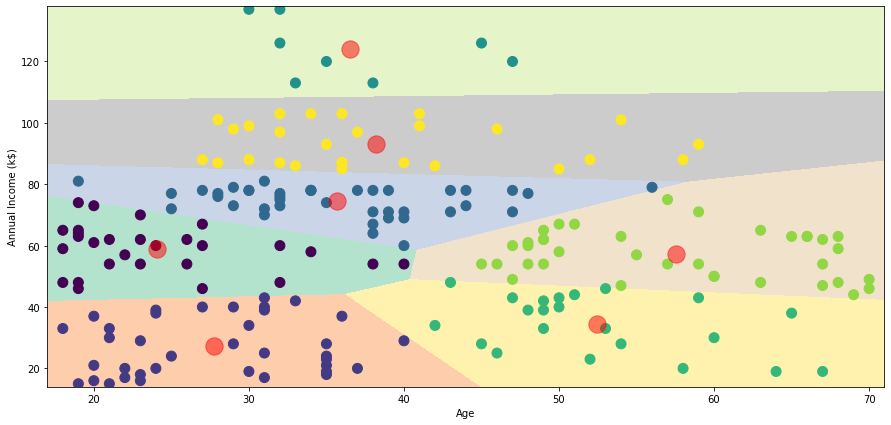

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Annual Income (k$)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Age')
plt.show()

In [ ]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

C:\Users\Virendra Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "


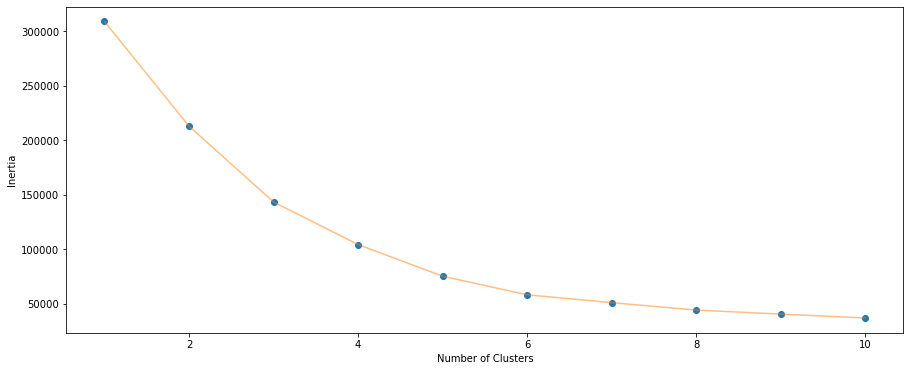

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 8,
        line=dict(
            color= df['cluster'],
            width= 10
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)